# Importing

In [23]:
import matplotlib.pyplot as plt
import fastai
import cv2
from fastai.vision import *
%matplotlib inline

# Loading model

In [2]:
learn = load_learner("/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/model")

# Getting prediction

In [199]:
def unscaleCoord(imagePoint):
  '''Returns [Height,Width]'''
  s = torch.tensor([imagePoint.size[0]/2 , imagePoint.size[1]/2],dtype=torch.float32)
  scaledCoord = imagePoint.data
  unscaledCoord = (scaledCoord+1.) * (s)
  return unscaledCoord

In [175]:
imagePoint.size[0]

360

In [177]:
imagePoint.data 

tensor([[-0.4604, -0.2568]])

In [178]:
test_img = open_image('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/test/test.png')

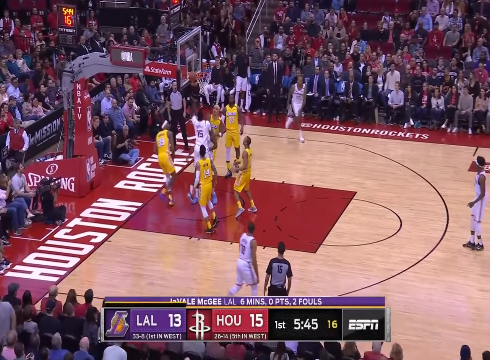

In [179]:
test_img.resize(torch.Size([test_img.shape[0] ,360,490]))

In [5]:
x = learn.predict(test_img)

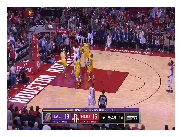

In [6]:
test_img.show(y=x[0])

In [181]:
imagePoint=x[0];imagePoint

ImagePoints (360, 490)

In [185]:
coord = unscaleCoord(imagePoint)

In [186]:
coord.flip(1)

tensor([[182.0790,  97.1229]])

In [187]:
scaleFactors

tensor([1.4694, 3.5556])

In [188]:
 print(coord.flip(1) * scaleFactors)

tensor([[267.5447, 345.3257]])


In [191]:
test= cv2.imread('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/test/test.png')


In [194]:
test.shape

(360, 490, 3)

In [193]:
 test= cv2.resize(img, (490,360))

In [196]:
center  = (coord.numpy()[0][1], coord.numpy()[0][0]);center

(182.07901, 97.12286)

In [197]:
test=cv2.circle(test,center,3,(255,255,0),2)

In [198]:
cv2.imwrite('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/test/result6.png' , test)

True

# Puting prediction into original image

In [204]:
def getScaleFactors(imgW, imgH, originalImgH , originalImgW):
    '''Returns scalefactor (wdith,height)'''
    return tensor(originalImgW/imgW , originalImgH/imgH);

In [222]:
def mapToOrginialImage(coord,scaleFactors):
    '''Returns coord (width, height)'''
    coordInOriginalImage = coord.flip(1) * scaleFactors
    return tuple(coordInOriginalImage[0].numpy())

In [206]:
img= cv2.imread('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/test/test.png')

In [207]:
#
img.shape

(720, 1280, 3)

In [208]:
scaleFactors = getScaleFactors(490,360,img.shape[0],img.shape[1]);scaleFactors

tensor([2.6122, 2.0000])

In [223]:
coordInOriginalImage= mapToOrginialImage(coord , scaleFactors);

In [224]:
tuple(coordInOriginalImage)

(475.63495, 194.24573)

In [225]:
drawn_img = cv2.circle(img,coordInOriginalImage,3,(255,255,0),1)

In [226]:
cv2.imwrite('/Users/sandeep/Desktop/FinalYearProject/YoutubeScreenshotScrapper/data/test/resu5.png' , drawn_img)

True